# Intern Project: Creating Insight From Textual Response Data
### Max Steffey, Spring 2023

About the current __test__ dataset: Contains a CSV file of user reviews for a new Harry Potter video game. The actual text version of the review (i.e. what the user has to say) is in one column of this file. To perform essential functions, isolate that column, and proceed.

With Egg data, a similar process will occur -- many of these functions will not change.

In [209]:
## importing libraries
import pandas as pd
import numpy as np
import os
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
import regex as re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords 

## import text files that contain common positive and negative words
tmp_pos = open('/Users/maxsteffey/Downloads/positive-words.txt', encoding='latin-1')
tmp_neg = open('/Users/maxsteffey/Downloads/negative-words.txt', encoding='latin-1')
pos = tmp_pos.read()
neg = tmp_neg.read()

## split text into a set for later matching
pw = set(pos.split())
nw = set(neg.split())
tmp_pos.close()
tmp_neg.close()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/maxsteffey/nltk_data...


In [108]:
## importing dataset
df = pd.read_csv('/Users/maxsteffey/Downloads/3611 ORIGINAL plus REFIELD merged With New Weight Var.csv', index_col=[0], 
                 encoding='latin-1', on_bad_lines='skip', lineterminator='\n')

/var/folders/rh/kgcvmvmn175_t7gp0r_z5ltc0000gq/T/ipykernel_10665/3465998606.py:2: DtypeWarning: Columns (331,395,484) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/maxsteffey/Downloads/3611 ORIGINAL plus REFIELD merged With New Weight Var.csv', index_col=[0],


In [141]:
## function that contains common preprocessing steps
def preprocessing(list_text):
    
    raw_text = ' '.join(list_text)
    
    ## convert to lowercase
    lower_text = raw_text.lower()
    
    ## remove punctuation, non-english chars, etc.
    letters_only = re.sub("[^A-Za-z' ]+"," ", lower_text)
     
    ## removes stopwords like "a", "the", "it", etc.
    sw = stopwords.words('english')
    tmp = letters_only.split()
    tmp_ar = [w for w in tmp if w not in sw]
    tmp_o = ' '.join(tmp_ar)
    return tmp_o


## Questions overview

### Question 1 asks: What’s one phrase or statement that best describes who you are? Thinking about it a different way: What is your personal mantra or what is the “theme song” that best describe you?

### Question 8 asks: How would you describe your perfect Saturday? Please describe what you would be doing, who would be there and why it’s the best description of your perfect day.

### Question 9 asks: Before we jump into asking you other questions, let’s get a little lighter! How would you best describe your sense of humor?

### Question 13a asks: Speaking of soda, we’d like you to think about Mountain Dew. You can think about the original Mountain Dew, Mountain Dew Zero, or even Mountain Dew Flavors. Describe the person who drinks this. In your own words, who is this brand for?

### Question 13br4 asks: I am _____ years old. But most days, I feel _____ years old. When I drink Mountain Dew, I feel _____ years old because (response) .

## Understanding general sentiment

In [19]:
## subsetting data to remove feedback column and trim to 1000 rows
data = df[['Q1', 'Q8', 'Q9', 'Q13A', 'Q13Br4']]
data.head()

,Q1,Q8,Q9,Q13A,Q13Br4
ï»¿record,,,,,
1,Focus your energy on the things you can change...,I would be relaxing at home chillin with frien...,I'm very sarcastic and funny I'm honest and tr...,A very fun loving energetic caring person,It brings back memories of camp it's where I d...
55,My main motto is every man who works hard will...,"Eating breakfast with family and children, the...",Telling jokes in difficult days and situations...,It is a brand for someone who pays attention t...,"It refreshes me, gives me energy and vitality,..."
56,"I am a friendly person, I love everyone and I ...",I prefer to spend Saturday with my friends out...,I am very funny and I always have a joke.,It is a brand for gourmets who have experience...,It is very fresh.
57,I am an ambitious person always striving for t...,Exercise activities and establish a party with...,I love to laugh and make funny situations with...,For people who exercise and care about health,Gives energy and vitality
66,One step at a time. One thing that describes...,A chill day relaxing and hanging out with my f...,Pretty adaptedable,For someone who works nights or need a pick me...,It gives me a little more energy


In [212]:
## appending all review data to one huge string
text = data['Q13A'] ## question 13a might be particularly illuminating. let's start there.

## stopwords
sw = stopwords.words('english')

## string type
string = ''
for i in text:
    string += str(i) + ' '

## creating final long string
fin_str = string.split(" ")
    
## list type
my_list = []
for i in text:
    my_list.append(str(i))

## creating list of clean responses
my_clean_list = []
for i in my_list:
    words = i.split()
    clean_words = [re.sub("[^A-Za-z' ]+"," ", w) for w in words]
    tmp_ar = [w for w in clean_words if w not in sw]
    clean_sentence = ' '.join(tmp_ar)
    my_clean_list.append(clean_sentence)


['A fun loving energetic caring person', 'It brand someone pays attention ingredients product want extra calories sugar large quantities time enjoys taste', 'It brand gourmets experience taste drink ', 'For people exercise care health', 'For someone works nights need pick want like coffee', 'I think high quality', 'He gourmet person loves joy pleasure', 'A person cares lot health', 'great persone', 'energized person love turn music', 'Portrays brand fulfills needs', 'person drinks mountain dew zero likes flavor taste drink think product delicious way energy indulgenment', 'It people like special taste', 'would relax person', 'great drink', 'person wants fun indulge', 'It s someone keeps healthy loves fun', 'Amazing person ', 'casual man like', 'anyone used', 'For people exercise care health', 'I think brand people want cool relax', 'great brand high quality tasty drinks worth money ', 'active interested', 'He responsible person enjoyable handsome', 'great one know drink', 'SPECIAL AND 

In [156]:
## preprocessing data
final_str = preprocessing(fin_str)
print(final_str)

fun loving energetic caring person brand someone pays attention ingredients product want extra calories sugar large quantities time enjoys taste brand gourmets experience taste drink people exercise care health someone works nights need pick want like coffee think high quality gourmet person loves joy pleasure person cares lot health great persone energized person love turn music portrays brand fulfills needs person drinks mountain dew zero likes flavor taste drink think product delicious way energy indulgenment people like special taste would relax person great drink person wants fun indulge someone keeps healthy loves fun amazing person casual man like anyone used people exercise care health think brand people want cool relax great brand high quality tasty drinks worth money active interested responsible person enjoyable handsome great one know drink special different smart cool outgoing person sense humor high quality likely lovely taste good price original us best one sure love ama

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
## recieves some abritrary text, calculates sentiment score by matching words to words in pw and nw
def gen_senti(text):
    import re
    clean_text = re.sub("[^A-Za-z']+"," ",text).lower().strip().replace("  ", " ") ## making text readable
    
    ## initialize counts
    pc = 0
    nc = 0
    total = 0
    
    ## split the cleaned text
    tmp = set(clean_text.split())
    
    ## iterate through tmp and edit counts accordingly
    for i in tmp:
        if i in pw:
            pc = pc + 1
            total = total + 1
        elif i in nw:
            nc = nc - 1
            total = total + 1
    
    ## see counts
    print(pc)
    print(nc)
            
    ## check on zeroDivError
    if total == 0:
        return 0
    
    ## calculate sentiment score
    else:
        S = (str((pc + nc) / total))
        return S

In [143]:
## print postivie words, negative words, and sentiment score
gen_senti(final_str)

136
-113


'0.09236947791164658'

As we can see from the score about, the sentiment index is slightly positive, which implies that users often mention more positive things than negative things about who the brand is for. Still, this isn't representative of perspective. More context is required.

## Looking at most-used words

In [144]:
## create dictionary of most used words in df
words = final_str.split(' ')
all_words = nltk.FreqDist(words)
mostCommon = all_words.most_common(20)
mostCommon

[('dew', 303),
 ('people', 302),
 ('mountain', 266),
 ('drink', 222),
 ('like', 203),
 ('brand', 175),
 ('person', 173),
 ('someone', 170),
 ('drinks', 101),
 ('think', 97),
 ('love', 94),
 ('energy', 90),
 ('good', 88),
 ('taste', 84),
 ('likes', 84),
 ('young', 81),
 ('sugar', 78),
 ('caffeine', 77),
 ('soda', 65),
 ('lot', 59)]

In [145]:
## convert to dataframe
com_words = pd.DataFrame(mostCommon)
com_words.rename(columns = {0:'word'}, inplace = True)
com_words.rename(columns = {1:'count'}, inplace = True)
com_words

,word,count
0,dew,303
1,people,302
2,mountain,266
3,drink,222
4,like,203
5,brand,175
6,person,173
7,someone,170
8,drinks,101
9,think,97


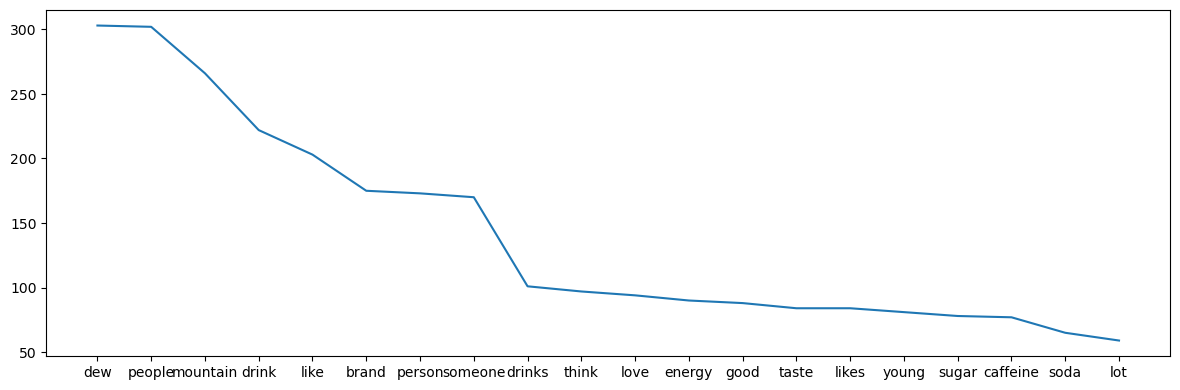

In [147]:
## create histogram to view
from matplotlib.pyplot import hist

plt.rcParams["figure.figsize"] = [14.50, 4.50]
plt.plot(com_words['word'], com_words['count'])
plt.show()

As we can see from the word frequency distribution, there are mostly  positive takeaways, which is in line with the earlier sentiment analysis. Words like 'like, love, young, sugar, energy, caffeine, taste' are particularly illuminating.

## To get a better picture of the unique words, lets calculate TF-IDF. Words like 'dew, mountain, person, someone, drink, brand' aren't quite as relevant here.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
word_list = final_str.split()
print(word_list)

['fun', 'loving', 'energetic', 'caring', 'person', 'brand', 'someone', 'pays', 'attention', 'ingredients', 'product', 'want', 'extra', 'calories', 'sugar', 'large', 'quantities', 'time', 'enjoys', 'taste', 'brand', 'gourmets', 'experience', 'taste', 'drink', 'people', 'exercise', 'care', 'health', 'someone', 'works', 'nights', 'need', 'pick', 'want', 'like', 'coffee', 'think', 'high', 'quality', 'gourmet', 'person', 'loves', 'joy', 'pleasure', 'person', 'cares', 'lot', 'health', 'great', 'persone', 'energized', 'person', 'love', 'turn', 'music', 'portrays', 'brand', 'fulfills', 'needs', 'person', 'drinks', 'mountain', 'dew', 'zero', 'likes', 'flavor', 'taste', 'drink', 'think', 'product', 'delicious', 'way', 'energy', 'indulgenment', 'people', 'like', 'special', 'taste', 'would', 'relax', 'person', 'great', 'drink', 'person', 'wants', 'fun', 'indulge', 'someone', 'keeps', 'healthy', 'loves', 'fun', 'amazing', 'person', 'casual', 'man', 'like', 'anyone', 'used', 'people', 'exercise', 'c

In [213]:
## instantiate vectorizer and apply to df
tr_idf = TfidfVectorizer()
matrix = tr_idf.fit_transform(my_clean_list)

## create readable array
matrix_array = matrix.toarray()

## get feature names
words_set = tr_idf.get_feature_names_out()

## create df
df_tf_idf = pd.DataFrame(matrix_array, columns = words_set)
df_tf_idf.max().sort_values(ascending=False)

good           1.000000
none           1.000000
lucky          1.000000
adventurous    1.000000
sure           1.000000
                 ...   
launches       0.146127
popularity     0.146127
slogan         0.146127
tickle         0.146127
campaign       0.146127
Length: 1652, dtype: float64